# Sistemas Lineales (Post-Clase)
## Trabajo realizado bajo el proyecto Macti: Modelación Computacional y Enseñanza
- Autor: Luis Miguel de la Cruz Salas


# Transferencia de calor

Cuando estamos cocinando y por accidente tocamos una sartén caliente con la mano, el calor se transferirá a nuestra piel por contacto y puede causarnos una quemadura. Lo sabemos por experiencia, el calor en exceso puede dañarnos. 

Pero ¿qué es eso que llamamos calor?

El **calor** es una forma de energía que se puede transferir de un sistema a otro como resultado de la diferencia en la temperatura. 

Es posible determinar las razones por las cuales esa forma de energía se transfiere en diferentes medios; a estas razones o procesos se les denomina **transferencia de calor** y se pueden diferenciar tres tipos:

1. **Conducción**: transferencia de calor basada en el contacto directo entre los cuerpos, sin intercambio de materia; el calor fluye desde un cuerpo de mayor temperatura a otro de menor temperatura que está en contacto con el primero, se dice que hay un *gradiente de temperaturas*.
2. **Convección**: transferencia de calor de un lugar a otro debida al movimiento de fluidos. Este tipo de transferencia es común en líquidos y gases, por ejemplo cuando se pone a hervir agua. 
3. **Radiación**: calor emitido en forma de ondas electromagnéticas, por ejemplo cuando se calienta un metal hasta llegar al rojo vivo.

<center>
<a title="Kmecfiunit, cmglee, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Heat-transmittance-means2.jpg"><img width="400" alt="Heat-transmittance-means2" src="https://upload.wikimedia.org/wikipedia/commons/f/f4/Heat-transmittance-means2.jpg"></a>
</center>

# Un ejemplo práctico.

En la figura se observa el calentamiento de una sartén. 

<center>
<a title="Kritzolina, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Making_a_pan_04.jpg"><img width="400" alt="Making a pan 04" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Making_a_pan_04.jpg/512px-Making_a_pan_04.jpg"></a>
</center>

El mango de esta sartén es de un material metálico cuya conductividad térmica $\kappa$ hace que el calor se transfiera rápidamente desde la parte caliente hasta el extremo opuesto.

¿Será posible determinar cómo es el cambio de temperaturas a lo largo del mango?

## Modelo Conceptual:

Considere el siguiente diagrama:

<center>
<img src="./Figuras/Sarten.png"  width='400px'/>
</center>

**Hipótesis**:
- El material del mango está hecho de **titanio**.
- La transferencia de calor es solo por conducción.
- Consideramos que tenemos temperaturas fijas en los extremos:
    - $T_A = 100 [^oC]$ y $T_B = 20 [^oC]$).
- No se consideran fuentes ni sumideros, es decir que no hay calentamiento ni enfriamiento en puntos intermedios del mango ($S=0$).
- $\kappa$ representa la conductividad térmica del titanio y está dada en unidades de $[W/K\cdot m]$.
- La longitud del mango es $L = 0.30 [m]$ y se puede representar como se muestra en la siguiente figura:

<center>
<img src="./Figuras/ModCon01.png"  width='500px'/>
</center>

## Modelo Matemático

Ecuación de transferencia de calor:
$$
c_p \rho \frac{\partial T}{\partial t} +
c_p \rho \frac{\partial}{\partial x_j} \left( u_j T \right) -
\frac{\partial }{\partial x_j} \left( \kappa \frac{\partial T}{\partial x_j}\right) = 
S
$$

donde se define lo siguiente: $c_p$ es la capacidad calorífica específica, 
$\rho$ es la densidad, $\kappa$ es la conductividad térmica, $S$ es la ganancia (fuente) o pérdida (sumidero) de calor y $\displaystyle \alpha = \frac{\kappa}{c_p \rho}$ es la difusividad térmica.
Además, $x_j$ y $t$ representan las coordenadas cartesianas: $(x_1, x_2, x_3) \equiv (x, y, z)$ y el  tiempo, respectivamente; mientras que $u_j$ es la velocidad del medio y $T$ la temperatura. Más detalles de este modelo puede consultarlos en (Herrera, 2012).

Tomando en cuenta todas las hipótesis del modelo conceptual, el modelo matemático a resolver es el siguiente:

$$
\begin{eqnarray}
-\kappa \frac{d^2 T}{d x^2} & = & S \qquad \text{Ecuación de conducción de calor en 1D.}\\ \\
T(x = 0) & = & T_A  \qquad \text{Condiciones de}\\
T(x = L) & = & T_B \qquad \text{ de frontera}
\end{eqnarray}
$$

Obsérvese que se tienen condiciones de tipo *Dirichlet*: la variable dependiente, $T$, está dada en las fronteras. Estas condiciones también se conocen como de *primer tipo*.

## Modelo numérico

Aunque en este caso es posible obtener una solución analítica, vamos a usar el método de diferencias finitas para aproximar una solución al modelo matemático anterior.

### Discretización del modelo matemático.

Recordemos que el modelo matemático consta de la siguiente ecuación:
$$
-\kappa \frac{d^2 T}{d x^2} = S \tag{1}
$$

Discretizamos la ecuación usando diferencias finitas de segundo orden:

- Consideramos un nodo $i$ de la malla, junto con sus vecinos $i+1$ e $i-1$, véase la siguiente figura: 

<center>
<img src="./Figuras/ModCon05.png"  width='500px'/>
</center>

- Observe que todas las celdas son de la misma longitud $h$: la malla es *estructurada* y *uniforme*. 

La aproximación de la derivada en el nodo $i$ se escribe como sigue (Leveque, 2007):
$$
\left.\frac{d^2 T}{d x^2}\right|_i = \frac{T_{i+1} - 2 T_{i} + T_{i-1}}{h^2} + \mathcal{O}(h^2)
$$

Ahora sustituimos esta última aproximación en la ecuación $(1)$ y rearreglamos términos para obtener:

$$
-r_i T_{i-1} + 2r_i T_{i} - r_i T_{i+1} = S_i \tag{2}
$$

donde $\displaystyle r_i = \frac{\kappa_i}{h^2}$ .

La ecuación (2) representa la conducción de calor en el nodo $i$, y hace uso de sus vecinos $i+1$ e $i-1$. En esta ecuación, tanto $\kappa_i$ como $S_i$ representan la conductividad térmica y la fuente en el nodo $i$.

En el caso que estamos estudiando, necesitamos calcular la temperatura en los nodos $i = 1, 2, 3, 4$, que son los nodos internos:

<center>
<img src="./Figuras/ModCon04.png"  width='500px'/>
</center>

Con base en la ecuación (2), debemos escribir una ecuación para cada uno de esos nodos:
$$
\begin{eqnarray*}
i = 1 \qquad \rightarrow \qquad -r_1 T_{0} + 2r_1 T_{1} - r_1 T_{2} & = & S_1 \\
i = 2 \qquad \rightarrow \qquad -r_2 T_{1} + 2r_2 T_{2} - r_2 T_{3} & = & S_2 \\
i = 3 \qquad \rightarrow \qquad -r_3 T_{2} + 2r_3 T_{3} - r_3 T_{4} & = & S_3 \\
i = 4 \qquad \rightarrow \qquad -r_4 T_{3} + 2r_4 T_{4} - r_4 T_{5} & = & S_4 
\end{eqnarray*}
$$

Este es un **sistema lineal** que se tiene que resolver para obtener la temperatura en cada uno de los nodos internos. Pero antes de hacerlo, debemos incluir las condiciones de frontera descritas en los modelos conceptual y matemático.

Para $i=1$ tenemos la condición $T_0  = T_A$:
- La ecuación para $i=1$ es: $-r_1 T_{0} + 2 r_1 T_{1} - r_1 T_{2} = S_1$
- Sustituyendo $T_0  = T_A$ obtenemos: $-r_1 \boxed{T_{A}} + 2 r_1 T_{1} - r_1 T_{2} = S_1$
- Pasando del lado derecho todo lo que es conocido obtenemos la ecuación para el nodo $i=1$ que incluye la condición de frontera:

$$
2 r_1 T_{1} - r_{1} T_{2} = S_1 + r_{1} T_A \tag{3}
$$

Para $i=4$, donde tenemos la condición $T_5 = T_B$,  seguimos el mismo procedimiento, de tal manera que la ecuación para este nodo, que incluye la condición de frontera, es (verificarlo):

$$
-r_{4} T_{3} + 2 r_{4} T_{4} = S_4 + r_{4} T_B \tag{4}
$$

Usando las ecuaciones $(3)$ y $(4)$ obtenemos el sistema lineal final:

$$
\begin{eqnarray*}
2 r_1 T_{1} - r_{1} T_{2} & = & S_1 + r_{1} T_A \\
-r_2 T_{1} + 2r_2 T_{2} - r_2 T_{3} & = & S_2 \\
-r_3 T_{2} + 2r_3 T_{3} - r_3 T_{4} & = & S_3 \\
-r_{4} T_{3} + 2 r_{4} T_{4} & = & S_4 + r_{4} T_B 
\end{eqnarray*}
$$

En forma matricial se puede escribir el sistema lineal anterior como sigue:

$$
\underbrace{
	\left[
	\begin{matrix}
	2 & -1 & 0 & 0   \\
	-1 & 2 & -1 & 0  \\
	0 & -1 & 2 & -1  \\
	0 & 0 & -1 & 2    
	\end{matrix}
	\right]}_{{A}_{N \times N}}
\underbrace{
\left[
\begin{matrix}
T_1 \\ T_2 \\ T_3 \\ T_{4}
\end{matrix}
\right]}_{{T}_N} =
\underbrace{
\frac{1}{r}
\left[
\begin{matrix}
S_1 \\ S_2 \\ S_3 \\ S_{4}
\end{matrix}
\right] +
\left[
\begin{matrix}
T_A \\ 0 \\ 0 \\ T_B
\end{matrix}
\right]}_{{b}_N}
$$

Este sistema lineal es el que se tiene que resolver para obtener las temperaturas en los nodos $1,2,3$ y $4$.

## Modelo Computacional

Para construir un algoritmo que permita resolver el sistema lineal anterior, debemos ir paso a paso.

<p style="color:Navy">1. <strong>Escribir una función en Python que genere la matriz del sistema lineal.</strong> </p>

In [1]:
%run "init2.ipynb"

In [2]:
# Se importan las bibliotecas Numpy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

#
#La siguiente función construye la matriz del sistema lineal
#
def buildMatrix(N):
    # Matriz de ceros
    A = np.zeros((N,N))

    # Primer renglón
    A[0,0] = 2
    A[0,1] = -1
    # Renglones interiores
    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    # Último renglón
    A[N-1,N-2] = -1
    A[N-1,N-1] = 2

    return A

In [3]:
# Probamos que la matriz se construye correctamente
A = buildMatrix(4)
A

array([[ 2., -1.,  0.,  0.],
       [-1.,  2., -1.,  0.],
       [ 0., -1.,  2., -1.],
       [ 0.,  0., -1.,  2.]])

<p style="color:Navy">2. <strong>Definir los parámetros físicos del problema.</strong></p>

In [4]:
L  = 0.3   # Longitud del mango de la sartén
TA = 100.0 # Temperatura en el lado caliente
TB = 20.0  # Temperatura en el extremo del mango
𝜅  = 21.9  # Conductividad térmica del titanio
S  = 0.0   # Fuente o sumidero

print("L = {}, TA = {}, TB = {}, 𝜅 = {}, S = {}".format(L, TA, TB, 𝜅, S))

L = 0.3, TA = 100.0, TB = 20.0, 𝜅 = 21.9, S = 0.0


<p style="color:Navy">3. <strong>Definir los parámetros numéricos.</strong> </p>

In [5]:
N = 4          # Número de nodos
h = L / (N+1)  # Espaciamiento entre los nodos
r = 𝜅 / h**2   # Factor r

print("N = {}, h = {}, r = {}".format(N, h, r))

N = 4, h = 0.06, r = 6083.333333333333


<p style="color:Navy">4. <strong>Definir los arreglos para almacenar la solución y para el lado derecho del sistema (RHS).</strong> </p>

In [6]:
# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Lado derecho del sistema (RHS)
b = np.zeros(N)
b[:] = S / r    # Fuente o sumidero
b[0]  += T[0]   # Condición de frontera izquierda
b[-1] += T[-1]  # Condición de frontera derecha

print("T = {}".format(T))
print("b = {}".format(b))

T = [100.   0.   0.   0.   0.  20.]
b = [100.   0.   0.  20.]


<p style="color:Navy">5. <strong>Construir la matriz y resolver el sistema lineal.</strong> </p>

In [7]:
# Construcción de la matriz
A = buildMatrix(N)

# Solución del sistema lineal usando un método de Numpy.
T[1:N+1] = np.linalg.solve(A,b)

<p style="color:Navy">6. <strong>Imprimir y graficar la solución.</strong> </p>

[100.  84.  68.  52.  36.  20.]


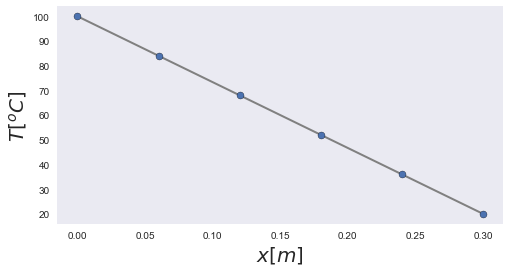

In [8]:
# Impresión de la solución 
print(T)

# Graficación de la solución
x = np.linspace(0, L, N+2)
plt.figure(figsize=(8,4))
plt.plot(x, T, c='grey', lw=2.0)
plt.scatter(x, T, edgecolor='k', zorder= 10)
plt.xlabel('$x [m]$')
plt.ylabel('$T [^oC]$')
plt.grid()
plt.show()

### <p style="color:Maroon">Ejercicio 1.</p>
En la siguiente celda complete el método de **Jacobi** para calcular la solución del sistema y pruebe la solución del sistema anterior para $N = 4$.

In [9]:
# Función que implementa el método de Jacobi

def jacobi(A,b,tol,kmax):
    N = len(b)         # Tamaño del sistema
    xnew = np.zeros(N) 
    xold = np.zeros(N) 
    error = 10
    error_array = np.zeros(kmax)
    k = 0
    while(error > tol and k < kmax):
        
        ### BEGIN SOLUTION
        for i in range(0,N):
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xold[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        ### END SOLUTION
        # Hint: Debes eliminar la línea: raise NotImplementedError()
        # y agregar el código faltante.

        error = np.linalg.norm(xnew-xold)
        error_array[k] = error
        k += 1
        xold[:] = xnew[:]
    return xnew, error, k, error_array

Pruebe que la función`jacobi(A,b,tol,kmax)` funciona con el siguiente código:

--------------------------------------------------------------------------------
La solución correcta para el método de Jacobi debe ser la siguiente:
[100.0, 83.99883835, 67.99836759, 51.99812041, 35.99899112, 20.0]
--------------------------------------------------------------------------------

¡Tu resultado es correcto!
[100.0, 83.99883835, 67.99836759, 51.99812041, 35.99899112, 20.0]


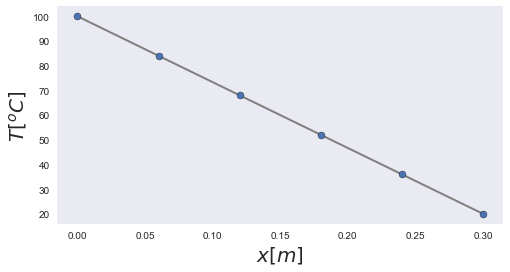

In [10]:
# Construcción de la matriz
A = buildMatrix(N)

# Arreglo para almacenar la solución
TJ = np.zeros(N+2)
TJ[0]  = TA  # Frontera izquierda
TJ[-1] = TB  # Frontera derecha

# Parámetros para el algoritmo de Jacobi
tol = 1e-3  # Tolerancia
niter = 100 # Número de iteraciones

# Solución del sistema lineal usando un método de Jacobi.
try:
    
    TJ[1:N+1], error, k, error_array = jacobi(A, b, tol, niter)
    
except NotImplementedError:
    print('Cuidado: aun no completas el código de Jacobi') 

else:
    # Verificación del resultado de los cálculos
    print(80*'-')
    print('La solución correcta para el método de Jacobi debe ser la siguiente:\n{}'.format(TJacobi))
    print(80*'-'+'\n')
    verifica(trunca(TJ), TJacobi)
    print(trunca(TJ))

    # Graficación de la solución
    x = np.linspace(0, L, N+2)
    plt.figure(figsize=(8,4))
    plt.plot(x, TJ, c='grey', lw=2.0)
    plt.scatter(x, TJ, edgecolor='k', zorder= 10)
    plt.xlabel('$x [m]$')
    plt.ylabel('$T [^oC]$')
    plt.grid()
    plt.show()

### <p style="color:Maroon">Ejercicio 2.</p>
Implemente el método de **Gauss-Seidel** para calcular la solución del sistema y pruebe la solución del sistema anterior para $N = 4$.

In [11]:
# Función que implementa el método de Gauss-Seidel

def gauss_seidel(A,b,tol,kmax):
    N = len(b)         # Tamaño del sistema
    xnew = np.zeros(N)
    xold = np.zeros(N)
    error = 10
    error_array = np.zeros(kmax)
    k = 0
    while(error > tol and k < kmax):
        
        ### BEGIN SOLUTION
        for i in range(0,N):
            xnew[i] = 0
            for j in range(0,i):
                xnew[i] += A[i,j] * xnew[j]
            for j in range(i+1,N):
                xnew[i] += A[i,j] * xold[j]                
            xnew[i] = (b[i] - xnew[i]) / A[i,i]
        ### END SOLUTION
        # Hint: Debes eliminar la línea: raise NotImplementedError()
        # y agregar el código faltante.
        
        error = np.linalg.norm(xnew-xold)
        error_array[k] = error
        k += 1
        xold[:] = xnew[:]
    return xnew, error, k, error_array

Pruebe que la función`gauss_seidel(A,b,tol,kmax)` funciona con el siguiente código:

--------------------------------------------------------------------------------
La solución correcta para el método de Gauss-Seidel debe ser la siguiente:
[100.0, 83.99883835, 67.99836759, 51.99812041, 35.99899112, 20.0]
--------------------------------------------------------------------------------

¡Tu resultado es correcto!
[100.0, 83.9990984, 67.99881979, 51.99904519, 35.99952259, 20.0]


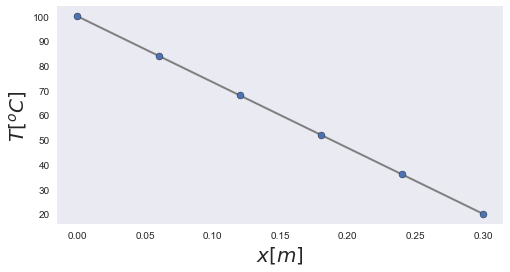

In [12]:
# Construcción de la matriz
A = buildMatrix(N)

# Arreglo para almacenar la solución
TG = np.zeros(N+2)
TG[0]  = TA  # Frontera izquierda
TG[-1] = TB  # Frontera derecha

# Parámetros para el algoritmo de Gauss-Seidel
tol = 1e-3  # Tolerancia
niter = 100 # Número de iteraciones

# Solución del sistema lineal usando un método de Gauss-Seidel.
try:
    
    TG[1:N+1], error, k, error_array = gauss_seidel(A, b, tol, niter)
    
except NotImplementedError:
    print('Cuidado: aun no completas el código de Jacobi') 

else:
    # Verificación del resultado de los cálculos
    print(80*'-')
    print('La solución correcta para el método de Gauss-Seidel debe ser la siguiente:\n{}'.format(TJacobi))
    print(80*'-'+'\n')
    verifica(trunca(TG), TGaussSeidel)
    print(trunca(TG))

    # Graficación de la solución
    x = np.linspace(0, L, N+2)
    plt.figure(figsize=(8,4))
    plt.plot(x, TG, c='grey', lw=2.0)
    plt.scatter(x, TG, edgecolor='k', zorder= 10)
    plt.xlabel('$x [m]$')
    plt.ylabel('$T [^oC]$')
    plt.grid()
    plt.show()

### <p style="color:Maroon">Ejercicio 3.</p>

La solución analítica del problema que se ha descrito en el Modelo Matemático es la siguiente:

$$
T(x) =\left(\frac{T_B - T_A}{L} + \frac{S}{2\kappa} \left(L - x\right) \right)x + T_A
$$

El código que sigue implementa la solución numérica del problema usando los métodos de Jacobi y Gauss-Seidel; también implementa la solución exacta antes descrita y compara esta solución con los resultados numéricos. 
Realice lo siguiente:
1. Ejecute el código y observe el resultado.
2. Cambie el número de puntos a $N = 15$ observe el resultado. Haga lo mismo pero ahora con $N = 25$.
3. Trate de mejorar el resultado para $N = 25$ modificando la tolerancia `tol` y el número de iteraciones `niter`.
4. Agregue una fuente poniendo $S = 100000.0$ y observe cual de los dos métodos es mejor con, $N = 25$, `tol = 1e-4` y `niter=200`.

Jacobi
Error = 1.3895149692707243, k = 100 

Gauss-Seidel
Error = 0.8929438341825879, k = 100 



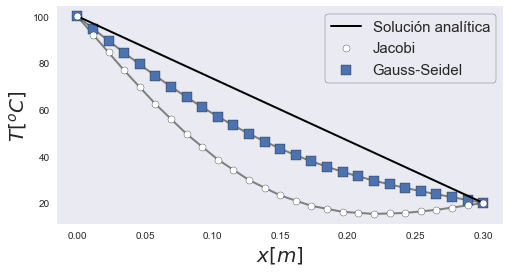

In [13]:
# Función que implementa la solución analítica del problema
def solucion(x, TA, TB, L, S, 𝜅):
    return (( TB - TA )/ L + ( S /(2*𝜅))*( L - x ))* x + TA

# Parámetros físicos
L  = 0.3  
TA = 100.0  
TB = 20.0   
𝜅  = 21.9 
S  = 0.0  

# Parámetros numéricos
N = 25
h = L / (N+1)
r = 𝜅 / h**2

# Arreglo para almacenar la solución
T = np.zeros(N+2)
T[0]  = TA  # Frontera izquierda
T[-1] = TB  # Frontera derecha

# Lado derecho del sistema
b = np.zeros(N)
b[:] = S / r # Fuente o sumidero
b[0]  += T[0]   # Condición de frontera
b[-1] += T[-1]  # Condición de frontera

# Construcción de la matriz
A = buildMatrix(N)

# Parámetros para los algoritmos de solución
tol = 1e-3
niter = 100

# Solución del sistema lineal con Jacobi
T[1:N+1], error, k, error_array = jacobi(A, b, tol, niter)
TJ = T.copy()
print("Jacobi")
print("Error = {}, k = {} \n".format(error, k))

# Solución del sistema lineal con Gauss-Seidel
T[1:N+1], error, k, error_array = gauss_seidel(A, b, tol, niter)
TG = T.copy()
print("Gauss-Seidel")
print("Error = {}, k = {} \n".format(error, k))

# Solución analítica
x = np.linspace(0, L, N+2)
Tsol = solucion(x, TA, TB, L, S, 𝜅)
#print(Tsol)
# Graficación de la solución
plt.figure(figsize=(8,4))

plt.plot(x, TJ, c='grey', lw=2.0, zorder=1)
plt.scatter(x, TJ, edgecolor='k', color='w', zorder= 10, alpha=1.0,label='Jacobi')
plt.plot(x, TG, c='grey', lw=2.0, zorder=1)
plt.scatter(x, TG, edgecolor='k', marker='s', zorder=2, s=100, alpha=1.0, label='Gauss-Seidel')
plt.plot(x, Tsol, c='k', lw=2.0, label='Solución analítica')

plt.xlabel('$x [m]$')
plt.ylabel('$T [^oC]$')
plt.grid()
plt.legend()
plt.show()

**Responda las siguientes preguntas**

1. ¿Qué sucede cuando se incrementa el número de incógnitas $N$?
2. ¿Para $N = 25$ y una tolerancia `tol`=$1e-4$, cuántas iteraciones necesita para que el Error sea menor que $0.01$? 
3. ¿Puede explicar por qué la solución es una parábola cuando $S \neq 0$?
4. ¿Qué método eligiría para resolver el problema de conducción de calor y por qué?

Respuestas esperadas:

1. La solución no converge al resultado correcto.

2. Para Jacobi = $773$, para Gauss-Seidel $407$.

3. De la fórmula de la solución, se ve que el término que contiene a $S$ no se hace cero y entonces se genera un término con $x^2$.

4. Gauss-Seidel por que requiere menos iteraciones para llegar a una buena aproximación.

# Referencias

1. Herrera, I., & Pinder, G. (2012). Mathematical modeling in science and engineering. Hoboken, N.J.: Wiley.

2. LeVeque, R. (2007). Finite difference methods for ordinary and partial differential equations. Philadelphia, Pa.: Society for Industrial and Applied Mathematics (SIAM, 3600 Market Street, Floor 6, Philadelphia, PA 19104).